In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-KKI_1/participants.tsv',
                  na_values=['n/a'])

In [3]:
sub_df = df.dropna(axis=1)
sub_df.head()

,site_id,participant_id,dx_group,age_at_scan,sex,handedness_category,handedness_scores,viq,piq,viq_test_type,piq_test_type,nonasd_psydx_icd9code,nonasd_psydx_label,eye_status_at_scan
0,ABIDEII-KKI_1,29273,1,8.476712,1,1.0,82.0,142.0,104.0,WISC-IV,WISC-IV,314.01,ADHD combined,1.0
1,ABIDEII-KKI_1,29274,1,9.246575,1,1.0,83.0,104.0,79.0,WISC-IV,WISC-IV,296.3,MDD (past),1.0
2,ABIDEII-KKI_1,29275,1,8.646575,1,1.0,100.0,130.0,121.0,WISC-IV,WISC-IV,313.81,ODD,1.0
3,ABIDEII-KKI_1,29276,1,9.216438,2,1.0,100.0,128.0,115.0,WISC-IV,WISC-IV,314.01; 300.29,ADHD combined; simple phobia,1.0
4,ABIDEII-KKI_1,29277,1,12.789041,1,1.0,90.0,132.0,123.0,WISC-IV,WISC-IV,314.01,ADHD hyperactive/impulsive,1.0


In [4]:
list(sub_df.keys())

['site_id',
 'participant_id',
 'dx_group',
 'age_at_scan ',
 'sex',
 'handedness_category',
 'handedness_scores',
 'viq',
 'piq',
 'viq_test_type',
 'piq_test_type',
 'nonasd_psydx_icd9code',
 'nonasd_psydx_label',
 'eye_status_at_scan']

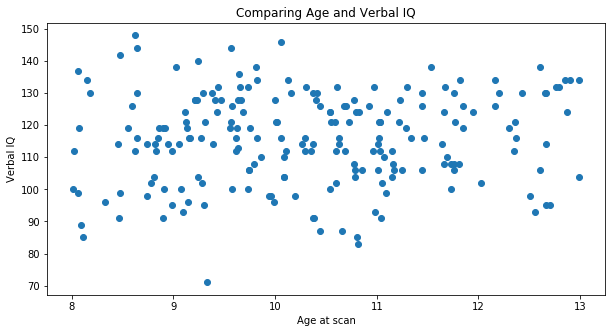

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ')

In [6]:
sns.set_context('poster')

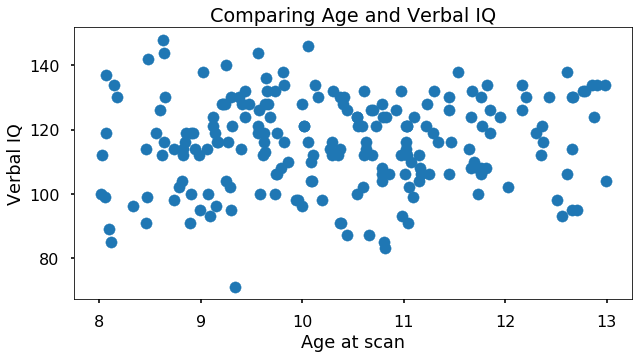

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ')

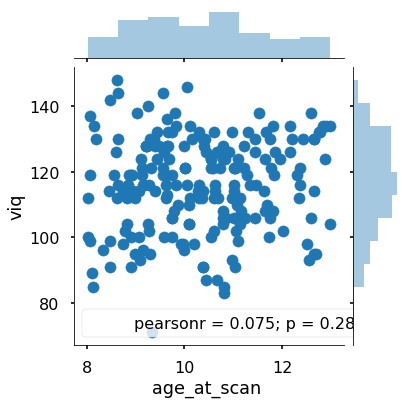

In [8]:
sns.jointplot(x='age_at_scan ', y='viq', data=sub_df)

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

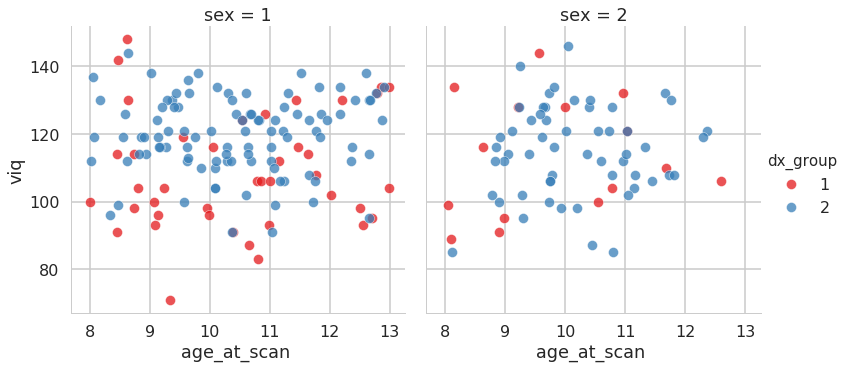

In [9]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('poster')
kws = dict(s=100, alpha=0.75, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(sub_df, col="sex", hue="dx_group", palette="Set1",
                  hue_order=[1, 2], size=5.5)
g = (g.map(plt.scatter, "age_at_scan ", "viq", **kws).add_legend())

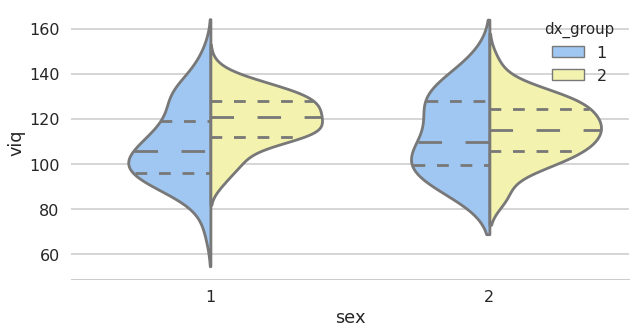

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.set(style="whitegrid", palette="pastel", color_codes=True, rc={"figure.figsize": (10, 5)})
sns.set_context('poster')
sns.violinplot(x="sex", y="viq", hue="dx_group", data=sub_df, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)

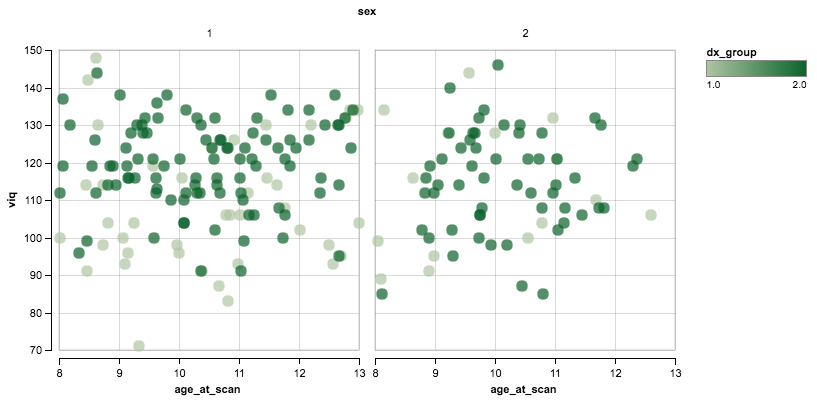

In [12]:
from altair import Chart, X, Y, Scale

Chart(sub_df).mark_circle(opacity=0.7, size=100).encode(
    column='sex',
    x=X('age_at_scan ',
        scale=Scale(
            zero=False,
        )),
    y=Y('viq',
        scale=Scale(
            zero=False,
        )),
    color='dx_group',
).configure_cell(
    height=300.0,
    width=300.0,
)